## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

## 1. Data Cleaning

### Read the dataset

In [174]:
import pandas as pd

df = pd.read_csv('TaskDataSet/Task (1) Dataset.csv')
print(df.shape)


(12316, 32)


### Handle Missing Values

In [176]:
updated_df = df.copy()

# List of columns to fill missing values with their mode
columns_to_fill = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Lanes_or_Medians', 'Road_allignment',
    'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Owner_of_vehicle',
    'Area_accident_occured', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality'
]

for column in columns_to_fill:
    if column in updated_df.columns:
        mode_value = updated_df[column].mode()[0]
        updated_df[column] = updated_df[column].fillna(mode_value)

if 'Educational_level' in updated_df.columns:
    updated_df['Educational_level'] = updated_df['Educational_level'].fillna(updated_df['Educational_level'].mode()[0])


### Correct any inconsistent data entries.

In [179]:
nulls = updated_df.isnull().sum()
nulls
#updated_df.to_csv('TaskDataSet/Task (11) Dataset.csv', index=False)
updated_df['Driving_experience'].value_counts()
updated_df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       6811
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

### Ensure data types are appropriate for each column.

---



In [184]:
updated_df = df.copy()

# and also the column Time is not in the right format, we can convert it to datetime
if 'Time' in updated_df.columns:
    updated_df['Time'] = pd.to_datetime(updated_df['Time'])

# we can see that the columns Service_year_of_vehicle and Driving_experience have missing
# values, we can fill them with the mean of the column
# we can also see that the 2 columns are not in the right format, we can convert them to int
# we will do this using the .replace() method
if 'Driving_experience' in updated_df.columns:
    updated_df['Driving_experience'] = updated_df['Driving_experience'].replace({
        'Below 1yr': 1,
        '1-2yr': 1.5,
        '2-5yr': 3,
        '5-10yr': 7,
        'Above 10yr': 15,
        'No Licence': 0,
        'Unknown': 0
    })
if 'Service_year_of_vehicle' in updated_df.columns:
    updated_df['Service_year_of_vehicle'] = updated_df['Service_year_of_vehicle'].replace({
        'Below 1yr': 1,
        '1-2yr': 1.5,
        '2-5yrs': 3,
        '5-10yrs': 7.5,
        'Above 10yr': 13,
        'Unknown': 0
    })


# List of categorical columns
categorical_columns = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
    'Defect_of_vehicle', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
    'Road_surface_type', 'Type_of_collision', 'Owner_of_vehicle', 'Area_accident_occured',
    'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality'
]

# Convert categorical columns to 'category' data type
for col in categorical_columns:
    if col in updated_df.columns:
        updated_df[col] = updated_df[col].astype('category')



/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_3199/969707168.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_3199/969707168.py:22: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Driving_experience
7          3363
3          2613
15         2262
1.5        1756
1          1342
0           118
unknown      33
Name: count, dtype: int64

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [158]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify and analyze patterns in the data.

In [186]:
updated_df.info()
updated_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  category      
 5   Vehicle_driver_relation      11737 non-null  category      
 6   Driving_experience           11487 non-null  category      
 7   Type_of_vehicle              11366 non-null  category      
 8   Owner_of_vehicle             11834 non-null  category      
 9   Service_year_of_vehicle      8388 non-null   float64       
 10  Defect_of_vehicle            7889 non-null   category      
 11  Area_accident_occured        12077 non-nu

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9749,2024-07-25 04:00:00,Friday,18-30,Male,Junior high school,Employee,1.5,Pick up upto 10Q,Owner,1.5,...,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
8328,2024-07-25 09:30:00,Saturday,31-50,Male,Junior high school,Employee,15,Lorry (41?100Q),Owner,1.5,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9266,2024-07-25 08:38:00,Thursday,Under 18,Male,High school,Owner,3,NaN,Organization,13.0,...,Other,na,na,na,na,Employee,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10529,2024-07-25 01:05:00,Friday,Under 18,Male,Elementary school,Employee,3,Lorry (41?100Q),Owner,1.0,...,Going straight,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
7903,2024-07-25 12:00:00,Wednesday,Unknown,Male,Elementary school,Employee,15,Public (13?45 seats),Owner,7.5,...,Moving Backward,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

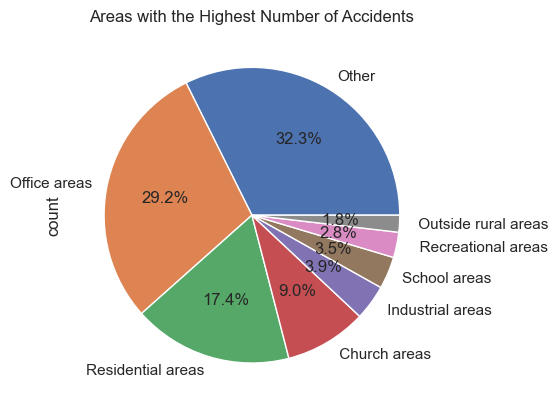

In [162]:
import matplotlib.pyplot as plt

# Count the number of accidents per area
accident_counts = updated_df['Area_accident_occured'].value_counts()

# Filter the areas with more than 200 accidents
filtered_areas = accident_counts[accident_counts > 200]

filtered_areas.plot(kind='pie', autopct='%1.1f%%')


plt.title('Areas with the Highest Number of Accidents')

# Display the chart
plt.show()


### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


<Axes: xlabel='Age_band_of_driver'>

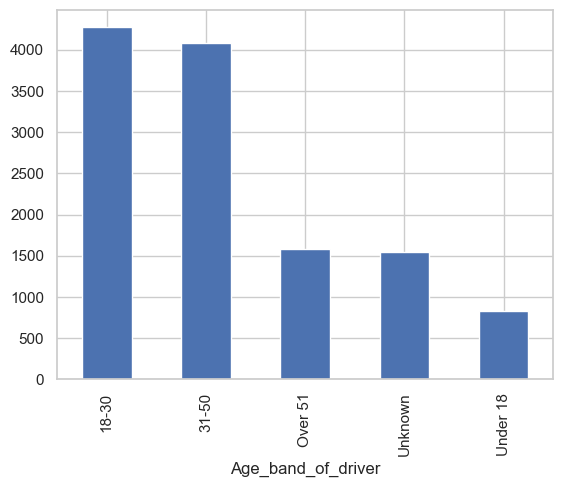

In [163]:
# we will see what are the most ages of people involved in accidents
# Count the number of accidents per age
age_counts = updated_df['Age_band_of_driver'].value_counts()

# Filter the ages with more than 200 accidents
filtered_ages = age_counts[age_counts > 200]

filtered_ages.plot(kind='bar')  



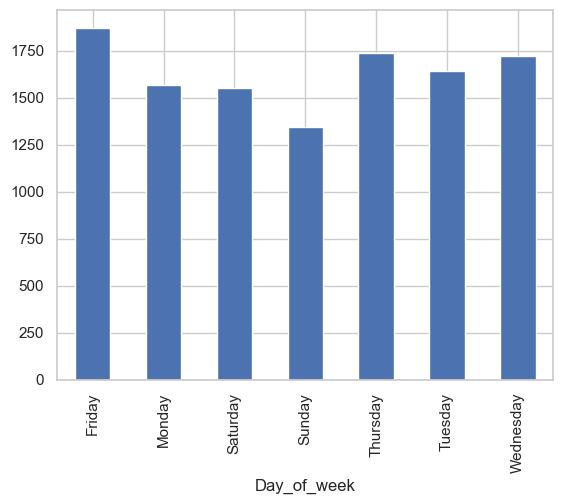

In [164]:
# here is a figure showing the accidents by day of the week
accidents_by_day = updated_df.groupby('Day_of_week')['Types_of_Junction'].count()
# let's plot the data
accidents_by_day.plot(kind='bar')
plt.show()

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


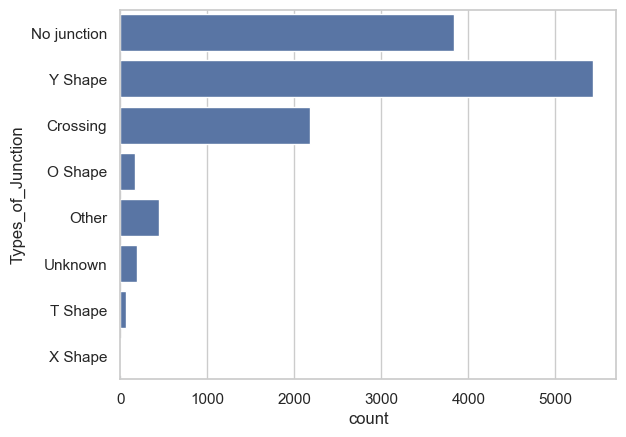

In [101]:
# Let's plot the distribution of types of junction
sns.countplot(updated_df['Types_of_Junction'])
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

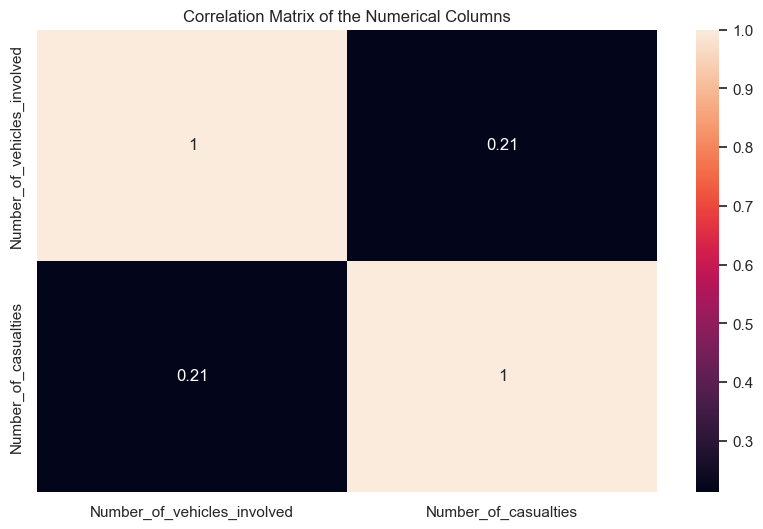

In [189]:
# Heatmap for correlation matrix
correlation_matrix_df = updated_df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_df, annot=True)
plt.title('Correlation Matrix of the Numerical Columns')
plt.show()


## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>